<a href="https://colab.research.google.com/github/thxxx/datascience/blob/master/MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data/movielens/'
os.listdir(path) # path에 뭐가 들어있는지 보여준다.

['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt']

In [ ]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

In [ ]:
print(ratings_df.shape)
print(ratings_df.head())
# time stamp 는 리뷰를 매긴 시점이다.

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
print(tags_df.shape)
print(tags_df.head())
# 유저가 영화에 준 태그

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [ ]:
print(movies_df.shape)
print(movies_df.head())
# 영화에 대한 메타 정보

(9742, 2)
                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy


In [ ]:
# 평점 데이터에 어떻게 평점을 내렸고 분포가 어떻게 되는지 기초 통계량을 살펴보자.
n_unique_users = len(ratings_df['userId'].unique()) # unique값은 중복을 없애고 몇명의 유저인지 보게해준다.
print(n_unique_users)

610


In [ ]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [ ]:
# 내장 함수를 사용해서 값을 구한다.
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.0425292390605359


In [ ]:
ratings_df.info()
# 데이터 타입, 널값 개수를 알려준다.
# 널값 처리도 데이터 전처리 과정에서 고민해봐야하는 부분임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings_df.describe()

userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

In [ ]:
# null 값이 있는지 확인한다.
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# 히스토그램 그려서 확인하기
ratings_df[['userId','movieId','rating']].hist()

In [ ]:
# 평점을 예측하고자 할 때 일반적으로 몇점을 주는지 성향을 확인하고 데이터 셋의 느낌을 확인해서
# 제대로된 알고리즘인지 파악할 수 있다.

In [ ]:
print(ratings_df.groupby(['userId', 'rating']).size())
# size()는 갯수 파악을 위해서 붙이나?



---



In [ ]:
ratings_df.groupby(['userId']).mean()
# userId로 전부 묶어서 보여준다.
# 데이터의 정보를 파악가능하다.

In [ ]:
userid_rating_df = pd.DataFrame({'count':ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)
# 위에서 확인한 유저가 평점 몇에 몇개를 줬는지는 새로운 데이터 프레임을 정의한 후 확인하는 과정.

In [ ]:
ratings_df.groupby('userId')['movieId'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [ ]:
user_info = ratings_df.groupby('userId')['movieId'].count()

In [ ]:
user_info.describe()
# 특정유저가 유독 많은 영화를 매겼다면 bias가 생길 수 있으니 조심하면 좋음

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [ ]:
import seaborn as sns
# 시각화 패키지

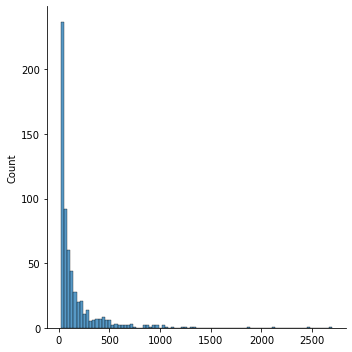

In [ ]:
sns.displot(user_info.values)

유저가 평균적으로 준 평점과 평점을 준 영화의 수를 새로운 데이터 프레임으로 만들어서 보관

In [ ]:
stats_df = pd.DataFrame({
    'movie_count':ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg':ratings_df.groupby('userId')['rating'].mean(),
    'rating_std':ratings_df.groupby('userId')['rating'].std()
})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


Rating이 많은 영화 즉, 사람들이 관심이 많은 영화 ( 좋다는건 아님 )

In [ ]:
movieid_user_df = pd.DataFrame({
    'num_users_watch':ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings':ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings':ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index() # 제일 첫 칼럼으로 index를 만든다.
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


표준편차가 작으면 대부분 평균근처의 점수를 줬다.
그럼 가장 많이 매긴순서대로 정렬해서 몇점인지 확인하자!

In [ ]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False).head(5)

movieId  num_users_watch  avg_ratings  std_ratings
314       356              329     4.164134     0.831244
277       318              317     4.429022     0.713019
257       296              307     4.197068     0.951997
510       593              279     4.161290     0.853983
1938     2571              278     4.192446     0.975243

대충은 보이는데.. 평균평점이 높으니까
별점을 준 유저가 1명이면 버릴건지 아닌지도 직접 판단해야되는 부분!

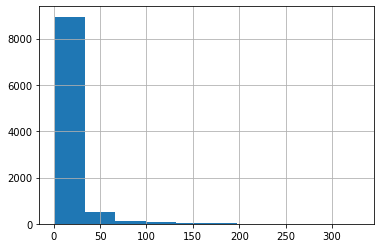

In [ ]:
movieid_user_df['num_users_watch'].hist()
# 행렬화 했을 때 해당영화에 별점을 안준 유저가 많다 -> 듬성듬성하다 -> sparse하다

In [ ]:
# 1명의 유저만 별점을 매긴 영화 수
movieid_user_df['movieId'][movieid_user_df.num_users_watch==1].count()

3446

In [ ]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

In [ ]:
movies_df.head()

title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy

In [ ]:
# 무비아이디를 기준으로 묶되 유저아이디의 수를 다 합쳐서 표현
ratings_count_df = ratings_df.groupby('movieId')['userId'].count(),
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [ ]:
df = pd.DataFrame({
    'ratings_count':ratings_df.groupby('movieId')['userId'].count(),
})
print(df.head(10))

         ratings_count
movieId               
1                  215
2                  110
3                   52
4                    7
5                   49
6                  102
7                   54
8                    8
9                   16
10                 132


In [ ]:
# apply가 뭐지
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [ ]:
df.head(10)

ratings_count                          movie_name
movieId                                                   
1                  215                    Toy Story (1995)
2                  110                      Jumanji (1995)
3                   52             Grumpier Old Men (1995)
4                    7            Waiting to Exhale (1995)
5                   49  Father of the Bride Part II (1995)
6                  102                         Heat (1995)
7                   54                      Sabrina (1995)
8                    8                 Tom and Huck (1995)
9                   16                 Sudden Death (1995)
10                 132                    GoldenEye (1995)

In [ ]:
df.sort_values(by='ratings_count', ascending=False)

ratings_count                              movie_name
movieId                                                       
356                329                     Forrest Gump (1994)
318                317        Shawshank Redemption, The (1994)
296                307                     Pulp Fiction (1994)
593                279        Silence of the Lambs, The (1991)
2571               278                      Matrix, The (1999)
...                ...                                     ...
4093                 1                              Cop (1988)
4089                 1                Born in East L.A. (1987)
58351                1  City of Men (Cidade dos Homens) (2007)
4083                 1                      Best Seller (1987)
193609               1     Andrew Dice Clay: Dice Rules (1991)

[9724 rows x 2 columns]

## 특정 영화의 평점 분포
movieId : 356, 포레스트 검프 (1994)

movieId : 2571. Matrix, The(1999)


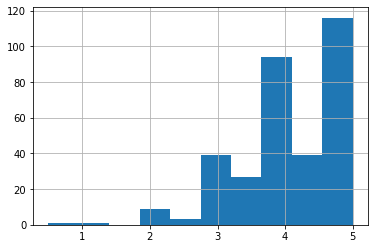

In [ ]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()

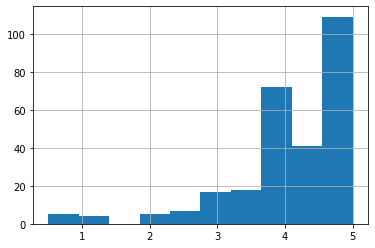

In [ ]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

# 특정 유저가 주는 평점과 실제 영화의 평점 분포가 비슷할까?

In [ ]:
# 356번의 영화에 2점 미만으로 점수를 준 데이터
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]

userId  movieId  rating   timestamp
12274      76      356     1.0  1439165536
13553      89      356     0.5  1520408275

In [ ]:
ratings_df[(ratings_df.movieId == 2571) & (ratings_df.rating < 2)]

userId  movieId  rating   timestamp
442         4     2571     1.0   945173385
1130       10     2571     0.5  1455356378
8706       59     2571     1.0   953609098
12239      75     2571     1.0  1158967564
17337     111     2571     0.5  1516140656
22474     153     2571     0.5  1525548255
65107     416     2571     1.0  1187496634
71534     461     2571     0.5  1505935248
71706     462     2571     0.5  1154037742

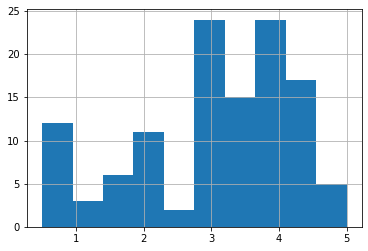

In [ ]:
ratings_df[ratings_df.userId == 76]['rating'].hist()

76번의 점수 매긴 분포를 보니 356번 영화를 추천하면 안되겠네

In [ ]:
movies_df['genres']

movieId
1         Adventure|Animation|Children|Comedy|Fantasy
2                          Adventure|Children|Fantasy
3                                      Comedy|Romance
4                                Comedy|Drama|Romance
5                                              Comedy
                             ...                     
193581                Action|Animation|Comedy|Fantasy
193583                       Animation|Comedy|Fantasy
193585                                          Drama
193587                               Action|Animation
193609                                         Comedy
Name: genres, Length: 9742, dtype: object

In [ ]:
movies_df.head(5)

title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy

In [ ]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [ ]:
import itertools
# 리스트안의 리스트들을 다 풀어서 하나의 리스트로 만들어준다.
genres = list(set(list(itertools.chain(*all_genres))))
print(genres)
print(len(genres))

['(no genres listed)', 'Comedy', 'Children', 'Documentary', 'Fantasy', 'Film-Noir', 'Sci-Fi', 'Western', 'IMAX', 'Mystery', 'Crime', 'Romance', 'Action', 'Horror', 'Musical', 'Thriller', 'War', 'Adventure', 'Animation', 'Drama']
20


In [ ]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

(no genres listed) Comedy Children  ... Adventure Animation Drama
movieId                                     ...                          
1                      NaN    NaN      NaN  ...       NaN       NaN   NaN
2                      NaN    NaN      NaN  ...       NaN       NaN   NaN
3                      NaN    NaN      NaN  ...       NaN       NaN   NaN
4                      NaN    NaN      NaN  ...       NaN       NaN   NaN
5                      NaN    NaN      NaN  ...       NaN       NaN   NaN

[5 rows x 20 columns]

In [ ]:
# 한줄씩 데이터프레임을 돌아가면서 각각의 무비아이디가 어떤 장르에 속하는지 1을 넣어준다.
# for loop으로!

ct = 0
for i, row in genres_df.iterrows():
  movie_id = row.name
  list_of_genres = movies_df.loc[movie_id]['genres'].split('|')

  genres_df.loc[movie_id][list_of_genres] = 1

# 상대적으로 느리다. 비효율적이다.

        (no genres listed) Comedy Children  ... Adventure Animation Drama
movieId                                     ...                          
1                      NaN      1        1  ...         1         1   NaN
2                      NaN    NaN        1  ...         1       NaN   NaN
3                      NaN      1      NaN  ...       NaN       NaN   NaN
4                      NaN      1      NaN  ...       NaN       NaN     1
5                      NaN      1      NaN  ...       NaN       NaN   NaN

[5 rows x 20 columns]


In [ ]:
genres_df.fillna(0, inplace=True)
genres_df['num_genres'] = genres_df.sum(axis=1)
genres_df.head()

(no genres listed)  Comedy  Children  ...  Animation  Drama  num_genres
movieId                                        ...                              
1                         0       1         1  ...          1      0         5.0
2                         0       0         1  ...          0      0         3.0
3                         0       1         0  ...          0      0         2.0
4                         0       1         0  ...          0      1         3.0
5                         0       1         0  ...          0      0         1.0

[5 rows x 21 columns]

In [ ]:
# get Dummies활용하기

genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

(no genres listed)  Action  Adventure  ...  Thriller  War  Western
movieId                                         ...                        
1                         0       0          1  ...         0    0        0
2                         0       0          1  ...         0    0        0
3                         0       0          0  ...         0    0        0
4                         0       0          0  ...         0    0        0
5                         0       0          0  ...         0    0        0

[5 rows x 20 columns]

In [ ]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

title  ... Western
movieId                                      ...        
1                          Toy Story (1995)  ...       0
2                            Jumanji (1995)  ...       0
3                   Grumpier Old Men (1995)  ...       0
4                  Waiting to Exhale (1995)  ...       0
5        Father of the Bride Part II (1995)  ...       0

[5 rows x 22 columns]

In [ ]:
# 전처리 끝난 장르스 칼럼은 없애버린다.
# axis=1는 칼럼이라는 뜻
movies_df.drop('genres', axis=1, inplace=True)
movies_df.head()

title  (no genres listed)  ...  War  Western
movieId                                                          ...              
1                          Toy Story (1995)                   0  ...    0        0
2                            Jumanji (1995)                   0  ...    0        0
3                   Grumpier Old Men (1995)                   0  ...    0        0
4                  Waiting to Exhale (1995)                   0  ...    0        0
5        Father of the Bride Part II (1995)                   0  ...    0        0

[5 rows x 21 columns]

# 특정 장르의 평점과 유저 분석 

In [ ]:
movies_df.columns
# 특정 장르의 평점 분포를 살펴본다. 액션이 전체적으로 높은 평점이면 모든 유저한테 액션만 추천이 될 수도 있으니

Index(['title', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
# 애니메이션이 들어가는건 모두다 뽑음
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list.head()

movieId
1               Toy Story (1995)
13                  Balto (1995)
48             Pocahontas (1995)
239        Goofy Movie, A (1995)
313    Swan Princess, The (1994)
Name: title, dtype: object

In [ ]:
# print(ratings_df['movieId'].isin(movieId_list.index))

animation_r_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
print(ratings_df.head())
print(animation_r_df.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
    userId  movieId  rating  timestamp
0        1        1     4.0  964982703
35       1      596     5.0  964982838
38       1      661     5.0  964982838
39       1      673     3.0  964981775
50       1     1023     5.0  964982681


In [ ]:
# user는 animation장르의 영화에 대해 다음과 같은 평점을 부여
animation_r_df.groupby('userId')['rating'].mean().head()

userId
1    4.689655
3    0.500000
4    4.000000
5    4.333333
6    4.071429
Name: rating, dtype: float64

In [ ]:
!pip install seaborn

# 장르간 상관관계
음의 상관관계를 갖는지, 음의 상관관계를 갖는지

In [ ]:
genres_df.corr()

(no genres listed)    Action  ...       War   Western
(no genres listed)            1.000000 -0.028442  ... -0.011956 -0.007816
Action                       -0.028442  1.000000  ...  0.076289  0.021600
Adventure                    -0.022840  0.291949  ...  0.010195  0.036136
Animation                    -0.015309  0.029659  ... -0.036990 -0.024378
Children                     -0.016005 -0.049652  ... -0.048341 -0.016890
Comedy                       -0.046878 -0.148968  ... -0.095919 -0.039622
Crime                        -0.022171  0.154471  ... -0.059585 -0.022997
Documentary                  -0.012871 -0.099463  ... -0.013378 -0.024915
Drama                        -0.053277 -0.152964  ...  0.135067 -0.025060
Fantasy                      -0.017447  0.059931  ... -0.043959 -0.021441
Film-Noir                    -0.005618 -0.031649  ... -0.019177 -0.004130
Horror                       -0.019769 -0.035443  ... -0.062206 -0.023065
IMAX                         -0.007599  0.131864  ... -0.009192 -0.004436
Musical                      -0.011151 -0.083331  ... -0.032252  0.018577
Mystery                      -0.014794 -0.028515  ... -0.043759 -0.019570
Romance                      -0.026195 -0.146670  ... -0.012262 -0.015724
Sci-Fi                       -0.019792  0.233475  ... -0.046464 -0.023135
Thriller                     -0.029073  0.199042  ... -0.044455 -0.028910
War                          -0.011956  0.076289  ...  1.000000  0.014063
Western                      -0.007816  0.021600  ...  0.014063  1.000000

[20 rows x 20 columns]

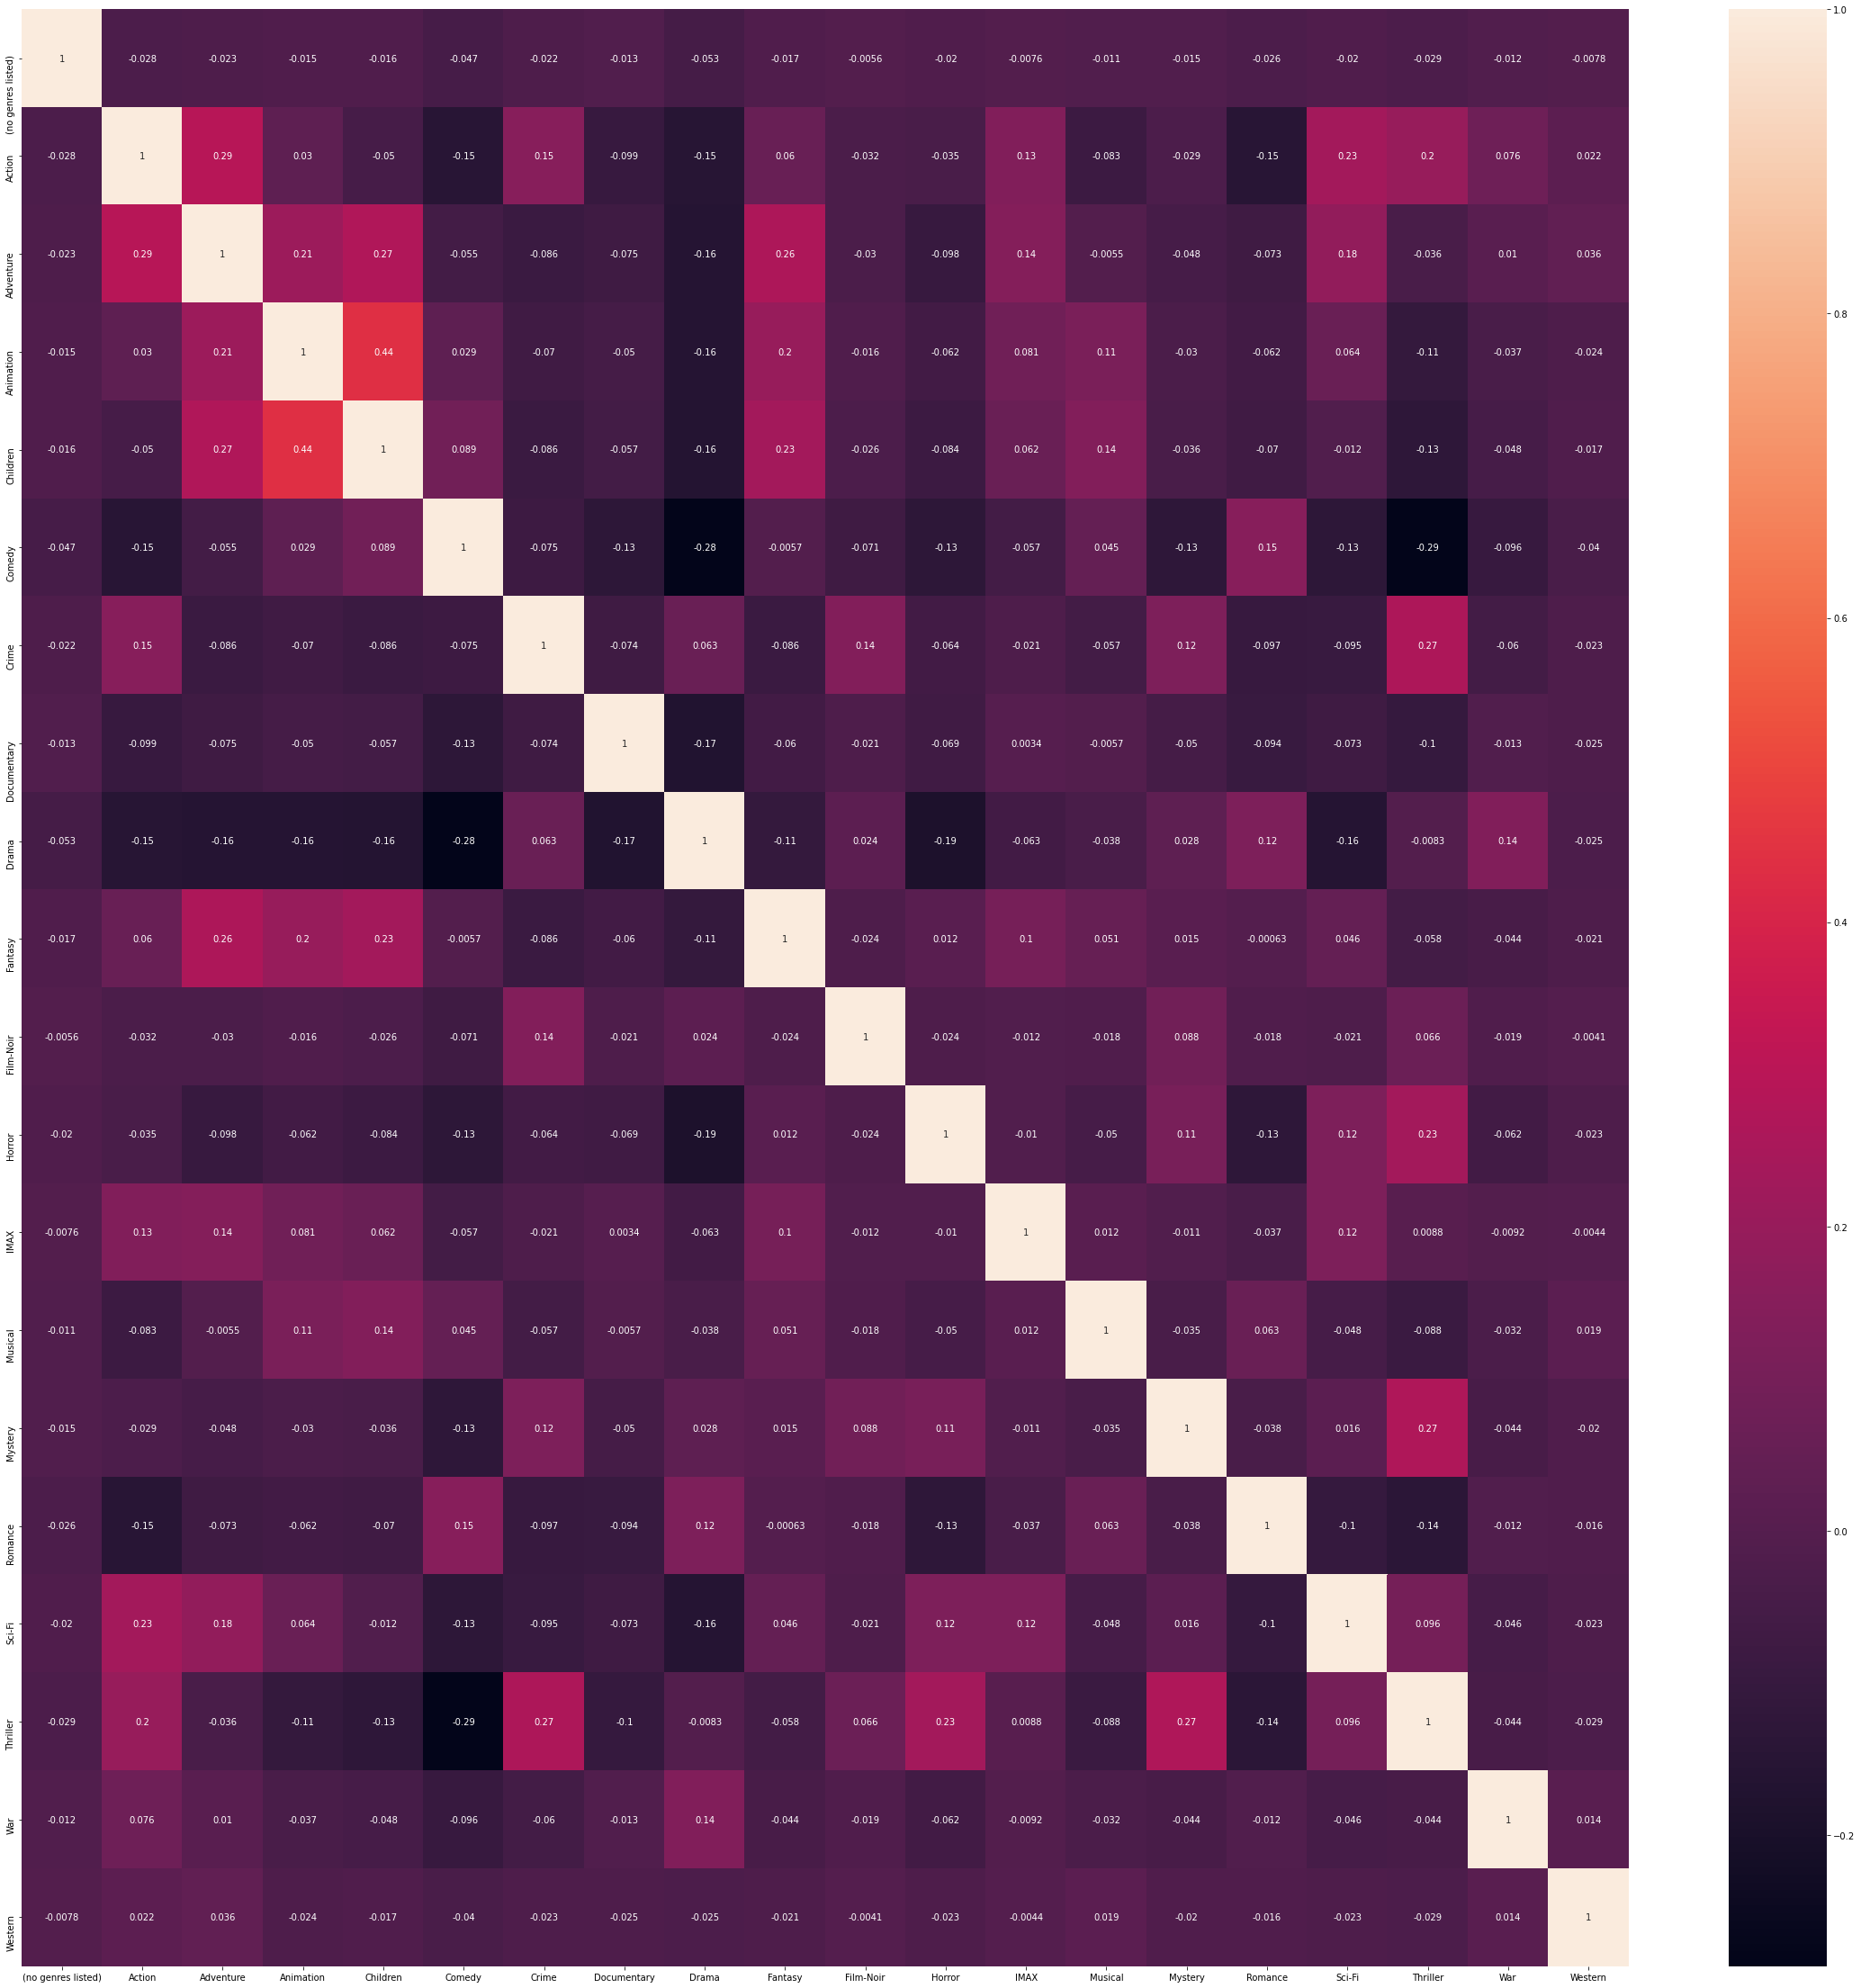

In [ ]:
import seaborn as sns

plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

# 영화 제목, 연도 분리하기

In [115]:
title_df = movies_df.copy()
title_df.head()

title  (no genres listed)  ...  War  Western
movieId                                                          ...              
1                          Toy Story (1995)                   0  ...    0        0
2                            Jumanji (1995)                   0  ...    0        0
3                   Grumpier Old Men (1995)                   0  ...    0        0
4                  Waiting to Exhale (1995)                   0  ...    0        0
5        Father of the Bride Part II (1995)                   0  ...    0        0

[5 rows x 21 columns]

In [116]:
title_df['year'] = title_df['title'].str.extract(('(\(\d\d\d\d\))'))
title_df.head()

title  ...    year
movieId                                      ...        
1                          Toy Story (1995)  ...  (1995)
2                            Jumanji (1995)  ...  (1995)
3                   Grumpier Old Men (1995)  ...  (1995)
4                  Waiting to Exhale (1995)  ...  (1995)
5        Father of the Bride Part II (1995)  ...  (1995)

[5 rows x 22 columns]

In [117]:
# 연도가 없는 영화가 있을 수 있으니 확인해봐야함 넌값이 있는지
title_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64

In [118]:
title_df[title_df['year'].isnull()]

title  ...  year
movieId                                                     ...      
40697                                            Babylon 5  ...   NaN
140956                                    Ready Player One  ...   NaN
143410                                          Hyena Road  ...   NaN
147250   The Adventures of Sherlock Holmes and Doctor W...  ...   NaN
149334                                   Nocturnal Animals  ...   NaN
156605                                            Paterson  ...   NaN
162414                                           Moonlight  ...   NaN
167570                                              The OA  ...   NaN
171495                                              Cosmos  ...   NaN
171631                             Maria Bamford: Old Baby  ...   NaN
171749                   Death Note: Desu nôto (2006–2007)  ...   NaN
171891                                   Generation Iron 2  ...   NaN
176601                                        Black Mirror  ...   NaN

[13 rows x 22 columns]

In [119]:
title_df[title_df['(no genres listed)'] == 1].shape

(34, 22)

In [121]:
title_df.dropna(axis=0, inplace=True) # year이 nan인게 다 없어진다. 뭐든지 nan이 있는 axis=0//row 가 drop되는 듯
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

title  (no genres listed)  ...  Western  year
movieId                                                          ...               
1                          Toy Story (1995)                   0  ...        0  1995
2                            Jumanji (1995)                   0  ...        0  1995
3                   Grumpier Old Men (1995)                   0  ...        0  1995
4                  Waiting to Exhale (1995)                   0  ...        0  1995
5        Father of the Bride Part II (1995)                   0  ...        0  1995

[5 rows x 22 columns]

# 연도별 영화 데이터 분석

In [122]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [123]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1915      1
1908      1
1903      1
1902      1
Name: title, Length: 106, dtype: int64

In [124]:
movies_df.head()


title  (no genres listed)  ...  War  Western
movieId                                                          ...              
1                          Toy Story (1995)                   0  ...    0        0
2                            Jumanji (1995)                   0  ...    0        0
3                   Grumpier Old Men (1995)                   0  ...    0        0
4                  Waiting to Exhale (1995)                   0  ...    0        0
5        Father of the Bride Part II (1995)                   0  ...    0        0

[5 rows x 21 columns]

In [125]:
title_df.head()

title  (no genres listed)  ...  Western  year
movieId                                                          ...               
1                          Toy Story (1995)                   0  ...        0  1995
2                            Jumanji (1995)                   0  ...        0  1995
3                   Grumpier Old Men (1995)                   0  ...        0  1995
4                  Waiting to Exhale (1995)                   0  ...        0  1995
5        Father of the Bride Part II (1995)                   0  ...        0  1995

[5 rows x 22 columns]

In [127]:
title_df[title_df['year']=='2017']

title  ...  year
movieId                                                     ...      
122896   Pirates of the Caribbean: Dead Men Tell No Tal...  ...  2017
122898                               Justice League (2017)  ...  2017
122906                                Black Panther (2017)  ...  2017
122916                               Thor: Ragnarok (2017)  ...  2017
122918                    Guardians of the Galaxy 2 (2017)  ...  2017
...                                                    ...  ...   ...
190215                                 Liquid Truth (2017)  ...  2017
191005                                      Gintama (2017)  ...  2017
193581           Black Butler: Book of the Atlantic (2017)  ...  2017
193583                        No Game No Life: Zero (2017)  ...  2017
193585                                        Flint (2017)  ...  2017

[147 rows x 22 columns]

In [128]:
# 이게 무비 아이디
title_df[title_df['year']=='2017'].index
# 이게 위랑 일치하는 레이팅의 무비 아이디. 이걸로 평점을 가져온다.
ratings_df['movieId'].isin(title_df[title_df['year']=='2017'].index)
# 평점의 평균 가져오기
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']=='2017'].index)].mean()


3.5780911062906724

In [129]:
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [130]:
# 중복없는 값들
title_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [131]:
results = []
for year in title_df['year'].unique():
  avg_rating = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']==str(year)].index)].mean()
  results.append((year, avg_rating))

result_df = pd.DataFrame(results, columns=['year', 'avg_ratings'])
result_df.sort_values(by='year')

year  avg_ratings
91   1902     3.500000
92   1903     2.500000
105  1908     4.000000
84   1915     2.000000
87   1916     3.600000
..    ...          ...
100  2014     3.512879
101  2015     3.410386
102  2016     3.387261
103  2017     3.578091
104  2018     3.483516

[106 rows x 2 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd437a20b10>]],
      dtype=object)

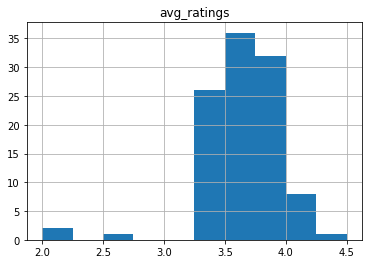

In [132]:
result_df.hist()